In [1]:
import bmdrc 
import pandas as pd

## Module 1: Input Data Modules 

##### Binary Class

In [2]:
morpho_example_wide = pd.read_csv("/Users/degn400/Git_Repos/bmdrc/data/Binary_Morphology_Wide.csv")

Wide = bmdrc.input_data_classes.BinaryClass(
    df = morpho_example_wide,
    chemical = "chemical.id",
    plate = "plate.id",
    well = "well",
    concentration = "conc",
    format = "wide"
)

print(Wide.df)
print(Wide.format)
print(Wide.chemical)
print(Wide.plate)
print(Wide.well)
print(Wide.concentration)
print(Wide.endpoint)
print(Wide.value)

       chemical.id  conc  plate.id well endpoint  value
0             3757   0.0     19877  H01     MO24    0.0
1             3757   0.0     19877  H02     MO24    0.0
2             3757   0.0     19877  H03     MO24    0.0
3             3757   0.0     19877  H04     MO24    0.0
4             3757   0.0     19877  H05     MO24    0.0
...            ...   ...       ...  ...      ...    ...
19867         3863  10.0     20637  H08     DNC_    0.0
19868         3863  10.0     20637  H09     DNC_    0.0
19869         3863  10.0     20637  H10     DNC_    0.0
19870         3863  10.0     20637  H11     DNC_    0.0
19871         3863  10.0     20637  H12     DNC_    0.0

[19872 rows x 6 columns]
wide
chemical.id
plate.id
well
conc
endpoint
value


In [3]:
morpho_example_long = pd.read_csv("/Users/degn400/Git_Repos/bmdrc/data/Binary_Morphology_Long.csv")

Long = bmdrc.input_data_classes.BinaryClass(
    df = morpho_example_long,
    chemical = "chemical.id",
    plate = "plate.id",
    well = "well",
    concentration = "conc",
    endpoint = "endpoint",
    value = "value"
)

print(Long.df)
print(Long.format)
print(Long.chemical)
print(Long.plate)
print(Long.well)
print(Long.concentration)
print(Long.endpoint)
print(Long.value)

       chemical.id  conc  plate.id well endpoint  value
0             3757   0.0     19877  H01     MO24    0.0
1             3757   0.0     19877  H02     MO24    0.0
2             3757   0.0     19877  H03     MO24    0.0
3             3757   0.0     19877  H04     MO24    0.0
4             3757   0.0     19877  H05     MO24    0.0
...            ...   ...       ...  ...      ...    ...
19867         3863  10.0     20637  H08     DNC_    0.0
19868         3863  10.0     20637  H09     DNC_    0.0
19869         3863  10.0     20637  H10     DNC_    0.0
19870         3863  10.0     20637  H11     DNC_    0.0
19871         3863  10.0     20637  H12     DNC_    0.0

[19872 rows x 6 columns]
long
chemical.id
plate.id
well
conc
endpoint
value


## Module 2: Pre-Processing Modules

#### Binary Class: Combine Endpoints

In [4]:
endpoint_dict = {"ANY24":["MO24", "DP24", "SM24", "NC24"], 
                 "ANY120":["MORT", "YSE_", "AXIS", "EYE_", "SNOU", "JAW_", "OTIC", "PE__", "BRAI", 
                           "SOMI", "PFIN", "CFIN", "PIG_", "CIRC", "TRUN", "SWIM", "NC__", "TR__", 
                           "MO24", "DP24", "SM24", "NC24"],
                "TOT_MORT":["MO24","MORT"],
                "ALL_BUT_MORT":["DP24","SM24","NC24", "YSE_", "AXIS", "EYE_", "SNOU", "JAW_", 
                                "OTIC", "PE__", "BRAI", "SOMI", "PFIN", "CFIN", "PIG_", "CIRC",
                                "TRUN", "SWIM", "NC__", "TR__"],
                "BRN_": ["BRAI", "OTIC", "PFIN"],
                "CRAN":["EYE_", "SNOU", "JAW_"],
                "EDEM":["YSE", "PE__"],
                "LTRK":["TRUN", "CFIN"],
                "MUSC":["CIRC", "SWIM", "SOMI"],
                "SKIN":["PIG_"],
                "TCHR":["TR__"]}

# Add new endpoint - twice
Long.combine_and_create_new_endpoints(endpoint_dict)
Long.combine_and_create_new_endpoints({"ANY24":["MO24", "DP24", "SM24", "NC24"]})

Long.df

ANY24 is already an existing endpoint


,chemical.id,conc,plate.id,well,endpoint,value
0,3757,0.0,19877,H01,MO24,0.0
1,3757,0.0,19877,H02,MO24,0.0
2,3757,0.0,19877,H03,MO24,0.0
3,3757,0.0,19877,H04,MO24,0.0
4,3757,0.0,19877,H05,MO24,0.0
...,...,...,...,...,...,...
859,3863,10.0,20637,H08,TCHR,0.0
860,3863,10.0,20637,H09,TCHR,0.0
861,3863,10.0,20637,H10,TCHR,0.0
862,3863,10.0,20637,H11,TCHR,0.0


In [5]:
Long.report_combination

{'ANY24': ['MO24', 'DP24', 'SM24', 'NC24'],
 'ANY120': ['MORT',
  'YSE_',
  'AXIS',
  'EYE_',
  'SNOU',
  'JAW_',
  'OTIC',
  'PE__',
  'BRAI',
  'SOMI',
  'PFIN',
  'CFIN',
  'PIG_',
  'CIRC',
  'TRUN',
  'SWIM',
  'NC__',
  'TR__',
  'MO24',
  'DP24',
  'SM24',
  'NC24'],
 'TOT_MORT': ['MO24', 'MORT'],
 'ALL_BUT_MORT': ['DP24',
  'SM24',
  'NC24',
  'YSE_',
  'AXIS',
  'EYE_',
  'SNOU',
  'JAW_',
  'OTIC',
  'PE__',
  'BRAI',
  'SOMI',
  'PFIN',
  'CFIN',
  'PIG_',
  'CIRC',
  'TRUN',
  'SWIM',
  'NC__',
  'TR__'],
 'BRN_': ['BRAI', 'OTIC', 'PFIN'],
 'CRAN': ['EYE_', 'SNOU', 'JAW_'],
 'EDEM': ['YSE', 'PE__'],
 'LTRK': ['TRUN', 'CFIN'],
 'MUSC': ['CIRC', 'SWIM', 'SOMI'],
 'SKIN': ['PIG_'],
 'TCHR': ['TR__']}

In [6]:
Long.df[Long.df[Long.endpoint] == "DAVID"]

,chemical.id,conc,plate.id,well,endpoint,value


In [7]:
# Add new endpoint
Wide.combine_and_create_new_endpoints(endpoint_dict)

Wide.df

,chemical.id,conc,plate.id,well,endpoint,value
0,3757,0.0,19877,H01,MO24,0.0
1,3757,0.0,19877,H02,MO24,0.0
2,3757,0.0,19877,H03,MO24,0.0
3,3757,0.0,19877,H04,MO24,0.0
4,3757,0.0,19877,H05,MO24,0.0
...,...,...,...,...,...,...
859,3863,10.0,20637,H08,TCHR,0.0
860,3863,10.0,20637,H09,TCHR,0.0
861,3863,10.0,20637,H10,TCHR,0.0
862,3863,10.0,20637,H11,TCHR,0.0


#### Binary Class: Set wells to NA

In [8]:
Long.set_well_to_na(endpoint_name = "DNC_", endpoint_value = 1)

# All of these wells should be NA 
Long.df[Long.df["bmdrc.Well.ID"] == "3757 21.9 19877 B01"]


,chemical.id,conc,plate.id,well,endpoint,value,bmdrc.Well.ID
216,3757,21.9,19877,B01,MO24,NaN,3757 21.9 19877 B01
1080,3757,21.9,19877,B01,DP24,NaN,3757 21.9 19877 B01
1944,3757,21.9,19877,B01,SM24,NaN,3757 21.9 19877 B01
2808,3757,21.9,19877,B01,NC24,NaN,3757 21.9 19877 B01
3672,3757,21.9,19877,B01,MORT,NaN,3757 21.9 19877 B01
4536,3757,21.9,19877,B01,YSE_,NaN,3757 21.9 19877 B01
5400,3757,21.9,19877,B01,AXIS,NaN,3757 21.9 19877 B01
6264,3757,21.9,19877,B01,EYE_,NaN,3757 21.9 19877 B01
7128,3757,21.9,19877,B01,SNOU,NaN,3757 21.9 19877 B01
7992,3757,21.9,19877,B01,JAW_,NaN,3757 21.9 19877 B01


In [9]:
Long.set_well_to_na(endpoint_name = "MORT", endpoint_value = 1, except_endpoint = ["DP24", "MO24", "SM24", "MORT"])

# All but DP24, MO24, SM24, and MORT should be np.nan
Long.df[Long.df["bmdrc.Well.ID"] == "3757 2.65 19890 G04"]

,chemical.id,conc,plate.id,well,endpoint,value,bmdrc.Well.ID
63,3757,2.65,19890,G04,MO24,0.0,3757 2.65 19890 G04
927,3757,2.65,19890,G04,DP24,1.0,3757 2.65 19890 G04
1791,3757,2.65,19890,G04,SM24,0.0,3757 2.65 19890 G04
2655,3757,2.65,19890,G04,NC24,NaN,3757 2.65 19890 G04
3519,3757,2.65,19890,G04,MORT,1.0,3757 2.65 19890 G04
4383,3757,2.65,19890,G04,YSE_,NaN,3757 2.65 19890 G04
5247,3757,2.65,19890,G04,AXIS,NaN,3757 2.65 19890 G04
6111,3757,2.65,19890,G04,EYE_,NaN,3757 2.65 19890 G04
6975,3757,2.65,19890,G04,SNOU,NaN,3757 2.65 19890 G04
7839,3757,2.65,19890,G04,JAW_,NaN,3757 2.65 19890 G04


In [10]:
Long.report_well_na

[[['DNC_'], [1], None], [['MORT'], [1], ['DP24', 'MO24', 'SM24', 'MORT']]]

#### Binary Class: Remove Endpoint

In [11]:
# Should trigger an error
#Long.remove_endpoints(["DNC_", "CATS"])

In [12]:
# DNC_ should not be removed
Long.df[Long.df[Long.endpoint] == "DNC_"]

,chemical.id,conc,plate.id,well,endpoint,value,bmdrc.Well.ID
19008,3757,0.0,19877,H01,DNC_,0.0,3757 0.0 19877 H01
19009,3757,0.0,19877,H02,DNC_,0.0,3757 0.0 19877 H02
19010,3757,0.0,19877,H03,DNC_,0.0,3757 0.0 19877 H03
19011,3757,0.0,19877,H04,DNC_,0.0,3757 0.0 19877 H04
19012,3757,0.0,19877,H05,DNC_,0.0,3757 0.0 19877 H05
...,...,...,...,...,...,...,...
19867,3863,10.0,20637,H08,DNC_,0.0,3863 10.0 20637 H08
19868,3863,10.0,20637,H09,DNC_,0.0,3863 10.0 20637 H09
19869,3863,10.0,20637,H10,DNC_,0.0,3863 10.0 20637 H10
19870,3863,10.0,20637,H11,DNC_,0.0,3863 10.0 20637 H11


In [13]:
Long.remove_endpoints("DNC_")

In [14]:
Long.report_endpoint_removal

['DNC_']

In [15]:
Long.report_endpoint_removal

['DNC_']

## Module 3: Filtering Modules

#### Negative Control Filter

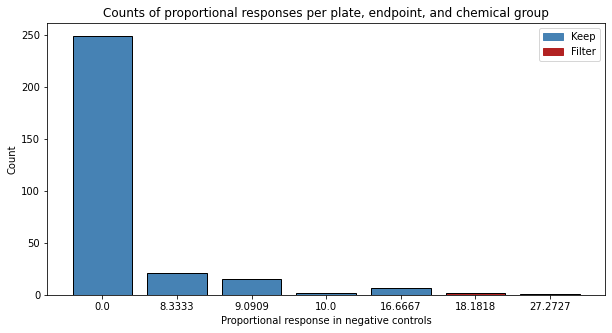

In [16]:
Long.filter_negative_control(percentage = 18, apply = False, diagnostic_plot = True)

In [17]:
Long.filter_negative_control_df

,Response,Count,Filter
0,0.000000,249,Keep
1,8.333333,21,Keep
2,9.090909,15,Keep
3,10.000000,2,Keep
4,16.666667,7,Keep
5,18.181818,2,Filter
6,27.272727,1,Filter


In [18]:
# Apply the negative control filter
Long.filter_negative_control(percentage = 18, apply = True)
Long.plate_groups

,chemical.id,conc,plate.id,endpoint,bmdrc.num.tot,bmdrc.num.nonna,bmdrc.num.affected,bmdrc.Plate.ID,bmdrc.Endpoint.ID,bmdrc.filter,bmdrc.filter.reason
0,3757,0.0,19877,ALL_BUT_MORT,12,12,0.0,3757 19877 ALL_BUT_MORT,3757 ALL_BUT_MORT,Keep,
1,3757,0.0,19877,ANY120,12,12,0.0,3757 19877 ANY120,3757 ANY120,Keep,
2,3757,0.0,19877,ANY24,12,12,0.0,3757 19877 ANY24,3757 ANY24,Keep,
3,3757,0.0,19877,AXIS,12,12,0.0,3757 19877 AXIS,3757 AXIS,Keep,
4,3757,0.0,19877,BRAI,12,12,0.0,3757 19877 BRAI,3757 BRAI,Keep,
...,...,...,...,...,...,...,...,...,...,...,...
2371,3863,10.0,20637,TCHR,12,8,0.0,3863 20637 TCHR,3863 TCHR,Keep,
2372,3863,10.0,20637,TOT_MORT,12,8,2.0,3863 20637 TOT_MORT,3863 TOT_MORT,Filter,negative_control_filter
2373,3863,10.0,20637,TRUN,12,6,0.0,3863 20637 TRUN,3863 TRUN,Keep,
2374,3863,10.0,20637,TR__,12,6,0.0,3863 20637 TR__,3863 TR__,Keep,


#### Minimum Concentration Filter

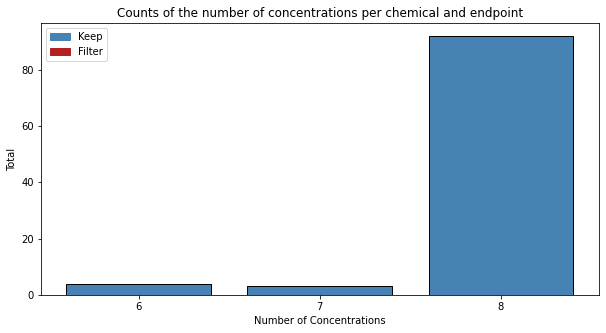

In [19]:
Long.filter_min_concentration(apply = False, diagnostic_plot = True)

In [20]:
Long.filter_min_concentration_df

,NumConc,Count,Filter
1,6,4,Keep
2,7,3,Keep
0,8,92,Keep


In [21]:
# Apply the minimum concentration filter
Long.filter_min_concentration(count = 8, apply = True)
Long.plate_groups[Long.plate_groups["bmdrc.Endpoint.ID"] == "3863 ANY24"]

,chemical.id,conc,plate.id,endpoint,bmdrc.num.tot,bmdrc.num.nonna,bmdrc.num.affected,bmdrc.Plate.ID,bmdrc.Endpoint.ID,bmdrc.filter,bmdrc.filter.reason
1586,3863,0.000,20312,ANY24,12,12,1.0,3863 20312 ANY24,3863 ANY24,Remove,min_concentration_filter
1619,3863,0.000,20627,ANY24,12,11,1.0,3863 20627 ANY24,3863 ANY24,Remove,min_concentration_filter
1652,3863,0.000,20637,ANY24,12,12,1.0,3863 20637 ANY24,3863 ANY24,Remove,min_concentration_filter
1685,3863,0.100,20312,ANY24,12,12,3.0,3863 20312 ANY24,3863 ANY24,Remove,negative_control_filter min_concentration_filter
1718,3863,0.100,20627,ANY24,12,9,1.0,3863 20627 ANY24,3863 ANY24,Remove,min_concentration_filter
1751,3863,0.100,20637,ANY24,12,11,3.0,3863 20637 ANY24,3863 ANY24,Remove,negative_control_filter min_concentration_filter
1784,3863,0.254,20312,ANY24,12,12,2.0,3863 20312 ANY24,3863 ANY24,Remove,min_concentration_filter
1817,3863,0.254,20627,ANY24,12,11,3.0,3863 20627 ANY24,3863 ANY24,Remove,negative_control_filter min_concentration_filter
1850,3863,0.254,20637,ANY24,12,12,2.0,3863 20637 ANY24,3863 ANY24,Remove,min_concentration_filter
1883,3863,0.645,20312,ANY24,12,12,0.0,3863 20312 ANY24,3863 ANY24,Remove,min_concentration_filter


#### Correlation Score Filter

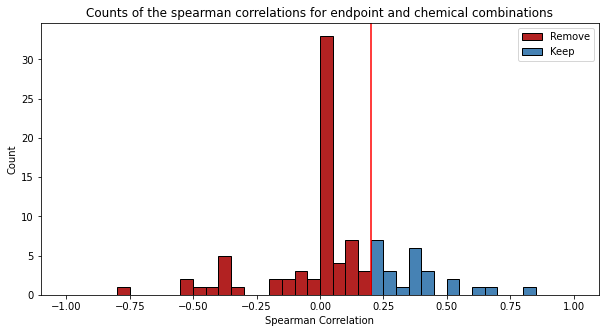

In [22]:
Long.filter_correlation_score(score = 0.2, diagnostic_plot = True)

In [23]:
Long.filter_correlation_score_df

,bmdrc.Endpoint.ID,Spearman,Filter
0,3757 ALL_BUT_MORT,-0.180736,Remove
1,3757 ANY120,0.323359,Keep
2,3757 ANY24,0.610789,Keep
3,3757 AXIS,0.247436,Keep
4,3757 BRAI,-0.082479,Remove
...,...,...,...
87,3863 SWIM,0.000000,Remove
88,3863 TCHR,0.082479,Remove
89,3863 TRUN,-0.155870,Remove
90,3863 TR__,0.082479,Remove


In [24]:
Long.filter_correlation_score(score = 0.2, apply = True)

mytestdf = Long.plate_groups
mytestdf

,chemical.id,conc,plate.id,endpoint,bmdrc.num.tot,bmdrc.num.nonna,bmdrc.num.affected,bmdrc.Plate.ID,bmdrc.Endpoint.ID,bmdrc.filter,bmdrc.filter.reason
0,3757,0.0,19877,ALL_BUT_MORT,12,12,0.0,3757 19877 ALL_BUT_MORT,3757 ALL_BUT_MORT,Remove,correlation_score_filter
1,3757,0.0,19877,ANY120,12,12,0.0,3757 19877 ANY120,3757 ANY120,Keep,
2,3757,0.0,19877,ANY24,12,12,0.0,3757 19877 ANY24,3757 ANY24,Keep,
3,3757,0.0,19877,AXIS,12,12,0.0,3757 19877 AXIS,3757 AXIS,Keep,
4,3757,0.0,19877,BRAI,12,12,0.0,3757 19877 BRAI,3757 BRAI,Remove,correlation_score_filter
...,...,...,...,...,...,...,...,...,...,...,...
2371,3863,10.0,20637,TCHR,12,8,0.0,3863 20637 TCHR,3863 TCHR,Remove,correlation_score_filter
2372,3863,10.0,20637,TOT_MORT,12,8,2.0,3863 20637 TOT_MORT,3863 TOT_MORT,Remove,negative_control_filter min_concentration_filter
2373,3863,10.0,20637,TRUN,12,6,0.0,3863 20637 TRUN,3863 TRUN,Remove,correlation_score_filter
2374,3863,10.0,20637,TR__,12,6,0.0,3863 20637 TR__,3863 TR__,Remove,correlation_score_filter


Filter suggestions: 
- Add a filter to remove a concentration if it doesn't have enough non-NA values 

## Module 4: Fit Models

In [25]:
Long.fit_models(gof_threshold = 0.1, aic_threshold = 2, model_selection = "lowest BMDL")

In [27]:
# Summary Statistics for filtered values 
Long.bmds_filtered

,bmdrc.Endpoint.ID,Model,BMD10,BMDL,BMD50,AUC,Min_Dose,Max_Dose,AUC_Norm
0,3757 ALL_BUT_MORT,NaN,NaN,NaN,NaN,1.595543,0.0,30.0,0.053185
1,3757 BRAI,NaN,NaN,NaN,NaN,0.983144,0.0,30.0,0.032771
2,3757 CFIN,NaN,NaN,NaN,NaN,0.000000,0.0,30.0,0.000000
3,3757 CIRC,NaN,NaN,NaN,NaN,0.000000,0.0,30.0,0.000000
4,3757 CRAN,NaN,NaN,NaN,NaN,0.983144,0.0,30.0,0.032771
...,...,...,...,...,...,...,...,...,...
69,3863 TCHR,NaN,NaN,NaN,NaN,0.041458,0.0,10.0,0.004146
70,3863 TOT_MORT,NaN,NaN,NaN,NaN,2.008254,0.0,10.0,0.200825
71,3863 TRUN,NaN,NaN,NaN,NaN,0.064777,0.0,10.0,0.006478
72,3863 TR__,NaN,NaN,NaN,NaN,0.045227,0.0,10.0,0.004523


In [28]:
Long.failed_pvalue_test

['3861 JAW_', '3861 PE__', '3861 TRUN', '3861 TR__']

## Module 5: Output Modules

#### Benchmark Dose

In [29]:
Long.output_benchmark_dose()
response = Long.output_res_benchmark_dose
response

,Chemical_ID,End_Point,Model,BMD10,BMDL,BMD50,AUC,Min_Dose,Max_Dose,AUC_Norm,DataQC_Flag,BMD_Analysis_Flag,BMD10_Flag,BMD50_Flag,bmdrc.Endpoint.ID
18,3863,MUSC,Log Probit,0.0,0.0,0.0,0.146458,0.0,10.0,0.014646,1,2,1,1,3863 MUSC
15,3863,ALL_BUT_MORT,Log Probit,0.0,0.0,0.0,0.457125,0.0,10.0,0.045713,1,2,1,1,3863 ALL_BUT_MORT
2,3757,AXIS,Log Probit,0.0,0.0,0.0,0.872727,0.0,30.0,0.029091,1,2,1,1,3757 AXIS
3,3757,BRN_,Log Probit,0.0,0.0,0.0,0.983144,0.0,30.0,0.032771,1,2,1,1,3757 BRN_
4,3757,MO24,Log Probit,0.0,0.0,0.0,2.082500,0.0,30.0,0.069417,1,2,1,1,3757 MO24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,3757,TCHR,NaN,NaN,NaN,NaN,0.000000,0.0,30.0,0.000000,0,0,0,0,3757 TCHR
20,3757,SWIM,NaN,NaN,NaN,NaN,0.000000,0.0,30.0,0.000000,0,0,0,0,3757 SWIM
19,3757,SOMI,NaN,NaN,NaN,NaN,0.436364,0.0,30.0,0.014545,0,0,0,0,3757 SOMI
18,3757,SNOU,NaN,NaN,NaN,NaN,0.983144,0.0,30.0,0.032771,0,0,0,0,3757 SNOU


#### Model Fits

In [30]:
import numpy as np

Long.p_value_df.replace(0, np.nan, inplace = True)

Long.p_value_df

,Logistic,Gamma,Weibull,Log Logistic,Probit,Log Probit,Multistage2,Quantal Linear,bmdrc.Endpoint.ID
0,0.146597,0.182008,0.185671,NaN,NaN,0.185751,0.570666,0.146060,3757 ANY120
1,0.158583,0.092596,0.092209,NaN,NaN,1.000000,0.285999,0.132046,3757 ANY24
2,0.788421,0.874967,0.568812,NaN,NaN,1.000000,0.327662,0.532701,3757 AXIS
3,0.438601,0.394137,0.317671,NaN,NaN,1.000000,0.266147,0.435133,3757 BRN_
4,0.809580,0.803091,0.815325,NaN,NaN,1.000000,0.519515,0.799101,3757 MO24
5,0.600434,0.677033,0.396299,NaN,NaN,1.000000,0.477175,0.432291,3757 MUSC
6,0.791856,0.866695,0.582222,NaN,NaN,1.000000,0.243296,0.559481,3757 NC__
7,0.264507,0.309531,0.128625,NaN,NaN,1.000000,0.177856,0.261819,3757 TOT_MORT
8,0.690683,0.747675,0.357185,NaN,NaN,NaN,0.999234,0.680722,3861 ALL_BUT_MORT
9,0.690683,0.747675,0.357185,NaN,NaN,NaN,0.999234,0.680722,3861 BRN_


In [31]:
Long.aic_df

,Logistic,Gamma,Weibull,Log Logistic,Probit,Log Probit,Multistage2,Quantal Linear,bmdrc.Endpoint.ID
0,86.638137,88.472932,88.805005,NaN,NaN,88.805448,97.013648,86.657349,3757 ANY120
1,69.408601,69.815751,69.810865,NaN,NaN,inf,81.185018,68.236637,3757 ANY24
2,16.550478,18.660599,18.069009,NaN,NaN,inf,40.293368,16.116423,3757 AXIS
3,44.333682,46.433468,45.376356,NaN,NaN,inf,61.892001,44.322095,3757 BRN_
4,92.288764,93.877172,96.935612,NaN,NaN,inf,102.066775,92.830286,3757 MO24
5,27.061557,29.116482,28.273402,NaN,NaN,inf,55.128764,26.572568,3757 MUSC
6,16.816201,18.897779,18.387216,NaN,NaN,inf,42.928197,16.443194,3757 NC__
7,64.343814,66.306683,67.164706,NaN,NaN,inf,74.852062,64.613628,3757 TOT_MORT
8,75.107103,77.135512,73.419277,NaN,NaN,NaN,128.174309,75.041024,3861 ALL_BUT_MORT
9,75.107103,77.135512,73.419277,NaN,NaN,NaN,128.174309,75.041024,3861 BRN_


In [30]:
Long.bmds

,bmdrc.Endpoint.ID,Model,BMD10,BMDL,BMD50,AUC,Min_Dose,Max_Dose,AUC_Norm,DataQC_Flag
0,3757 ANY120,Multistage2,12.515937,NaN,82.339332,4.016566,0.0,30.0,0.133886,1
1,3757 ANY24,Log Probit,0.000000,0.000000,0.000000,3.148952,0.0,30.0,0.104965,1
2,3757 AXIS,Log Probit,0.000000,0.000000,0.000000,0.872727,0.0,30.0,0.029091,1
3,3757 BRN_,Log Probit,0.000000,0.000000,0.000000,0.983144,0.0,30.0,0.032771,1
4,3757 MO24,Log Probit,0.000000,0.000000,0.000000,2.082500,0.0,30.0,0.069417,1
5,3757 MUSC,Log Probit,0.000000,0.000000,0.000000,0.436364,0.0,30.0,0.014545,1
6,3757 NC__,Log Probit,0.000000,0.000000,0.000000,0.000000,0.0,30.0,0.000000,1
7,3757 TOT_MORT,Log Probit,0.000000,0.000000,0.000000,2.421023,0.0,30.0,0.080701,1
8,3861 ALL_BUT_MORT,Multistage2,20.706777,NaN,136.222931,10.915814,0.0,100.0,0.109158,1
9,3861 BRN_,Multistage2,20.706777,NaN,136.222931,10.915814,0.0,100.0,0.109158,1


## Benchmark Dose Curves

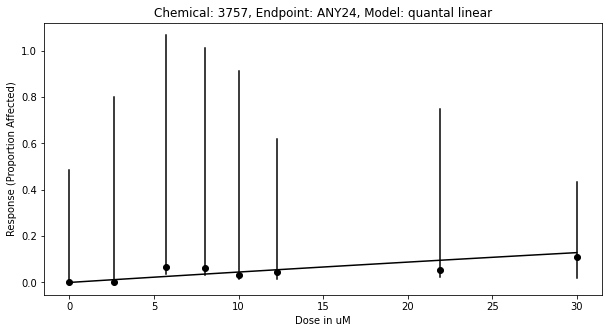

In [33]:
Long.response_curve(chemical_name = 3757, endpoint_name = "ANY24", model = "quantal linear")

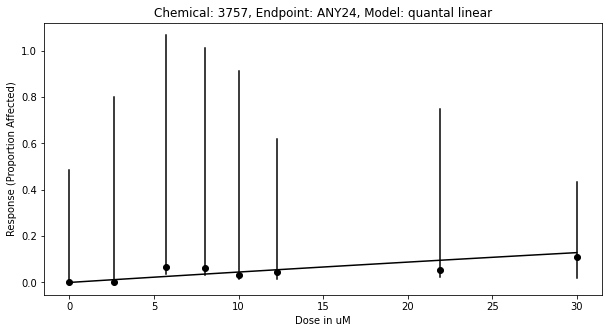

In [34]:
Long.response_curve(chemical_name = 3757, endpoint_name = "ANY24", model = "quantal linear")

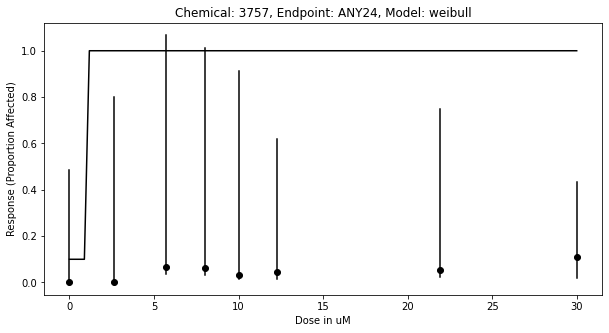

In [35]:
Long.response_curve(chemical_name = 3757, endpoint_name = "ANY24", model = "weibull")